In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from matplotlib import pyplot as plt
import cv2 

In [2]:
#Load up the Magenta Image Style Transfer TF Hub Module.
#This TF Hub Module is a pretrained neural network trained for neural style transferring.

model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

2022-07-12 23:21:52.733396: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#Reads file, detects image file type, converts it into a Tensor with 3 color channels, then converts our image's
#data type (dtype) to the format float32 (32 bits resolution for better speed), and finally adds it to a new array.

def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

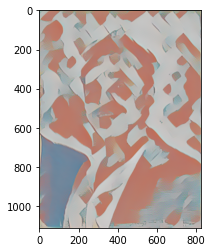

In [23]:
#Load in content and style images via the load_image function explained above.
#The content image is the image whose style we'll be transforming. 
#The style image is the image we'll be taking the style from.

content_image = load_image('adrian.jpeg')
style_image = load_image('sun.png')



#Perform the style transfer using the TF Hub model, then extract the first result [0].

stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]



#As a Tensor, we now need to use NumPy to squeeze the image from a series of arrays into a viewable image again.
#After that we're displaying an example of the image before choosing whether to save it or not. 

plt.imshow(np.squeeze(stylized_image))
plt.show()

In [22]:
#Use OpenCV to convert the default color from BGR to RGB, then we're again squeezing the image and saving it. 

cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True